In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [2]:
# Study data files
nba_salaries_path = "NBA_Salaries.csv"
wnba_salaries_path = "WNBA_salaries.csv"

In [3]:
# Read the mouse data and the study results
nba_salaries = pd.read_csv(nba_salaries_path)
wnba_salaries = pd.read_csv(wnba_salaries_path)

In [4]:
nba_salaries.columns

Index(['Year', 'Team', 'Player', 'Salary', 'Incentative'], dtype='object')

In [5]:
nba_salaries["Salary"] = nba_salaries["Salary"].str.replace("$","")

C:\Users\marye\AppData\Local\Temp\ipykernel_13560\4281388950.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  nba_salaries["Salary"] = nba_salaries["Salary"].str.replace("$","")


In [6]:
nba_salaries.dtypes

Year            int64
Team           object
Player         object
Salary         object
Incentative    object
dtype: object

In [7]:
nba_salaries["Salary"] = nba_salaries["Salary"].str.replace(",","")

In [8]:
nba_salaries["Salary"] = nba_salaries["Salary"].astype(float)

In [9]:
nba_salaries.dtypes

Year             int64
Team            object
Player          object
Salary         float64
Incentative     object
dtype: object

In [10]:
top_eighteen_best_paid_nba = nba_salaries.sort_values(by = "Salary", ascending = False)[:18]
top_eighteen_best_paid_nba

,Year,Team,Player,Salary,Incentative
15,2023,Golden State Warriors,Stephen Curry,51915615.0,NaN
65,2022,Golden State Warriors,Stephen Curry,48070014.0,NaN
45,2023,Phoenix Suns,Kevin Durant,47649433.0,NaN
25,2023,LA Lakers,LeBron James,47607350.0,NaN
46,2023,Phoenix Suns,Bradley Beal,46741590.0,"$1,242,000.00"
115,2021,Golden State Warriors,Stephen Curry,45780966.0,NaN
75,2022,LA Lakers,LeBron James,44474988.0,NaN
125,2021,LA Lakers,Russell Westbrook,44211146.0,NaN
95,2022,Phoenix Suns,Kevin Durant,44119845.0,NaN
16,2023,Golden State Warriors,Klay Thompson,43219440.0,NaN


In [11]:
top_ten_best_paid_nba = top_eighteen_best_paid_nba.drop_duplicates(["Player"])

In [12]:
x_axis = np.arange(0, len(top_ten_best_paid_nba["Player"]))

In [13]:
x_axis

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [14]:
Player = top_ten_best_paid_nba['Player']
Player

15         Stephen Curry
45          Kevin Durant
25          LeBron James
46          Bradley Beal
125    Russell Westbrook
16         Klay Thompson
195           Chris Paul
30           Rudy Gobert
26         Anthony Davis
0             Trae Young
Name: Player, dtype: object

In [15]:
Salary = top_ten_best_paid_nba['Salary']

## NBA Summary Stats

In [16]:
mean = nba_salaries.groupby('Year')['Salary'].mean()
mean

Year
2019    18486721.06
2020    17258761.60
2021    18653064.90
2022    23314706.70
2023    24683114.64
Name: Salary, dtype: float64

In [17]:
median = nba_salaries.groupby('Year')['Salary'].median()
median

Year
2019    17100000.0
2020    14937500.0
2021    17321428.5
2022    22340000.0
2023    20795500.0
Name: Salary, dtype: float64

In [18]:
variance = nba_salaries.groupby('Year')['Salary'].var()
pd.options.display.float_format = '{:.0f}'.format
variance

Year
2019    82463923941902
2020   104918381057929
2021   114100556360308
2022   139546950298509
2023   152114454862605
Name: Salary, dtype: float64

In [19]:
std = nba_salaries.groupby('Year')['Salary'].std()
pd.options.display.float_format = '{:.0f}'.format
std

Year
2019    9080965
2020   10242967
2021   10681786
2022   11812999
2023   12333469
Name: Salary, dtype: float64

In [20]:
sem = nba_salaries.groupby('Year')['Salary'].sem()
sem

Year
2019   1284242
2020   1448574
2021   1510633
2022   1670610
2023   1744216
Name: Salary, dtype: float64

In [21]:
summary_stats = nba_salaries.groupby('Year')['Salary'].agg(['mean', 'median', 'var', 'std','sem'])
display(summary_stats)

,mean,median,var,std,sem
Year,,,,,
2019,18486721,17100000,82463923941902,9080965,1284242
2020,17258762,14937500,104918381057929,10242967,1448574
2021,18653065,17321428,114100556360308,10681786,1510633
2022,23314707,22340000,139546950298509,11812999,1670610
2023,24683115,20795500,152114454862605,12333469,1744216


## NBA Graphs

In [30]:
df = nba_salaries.describe()

In [34]:
df

,Year,Salary
count,250,250
mean,2021,20479274
std,1,11199813
min,2019,2964840
25%,2020,11080125
50%,2021,18357000
75%,2022,27503472
max,2023,51915615


In [36]:
# df['Salary'].plot(kind = "bar", color = "blue")

# plt.title("NBA Summary")
# plt.xlabel("Summary Stats")
# #plt.xticks(wnba_x_axis,wnba_player,rotation=45)
# #plt.ylim(210000,236000)
# plt.ylabel("Salary ($)")
# plt.tight_layout()
# plt.ticklabel_format(style='plain', useOffset=False, axis='y')
# plt.savefig("graph_outputs/NBA_summary.png")
# plt.show()

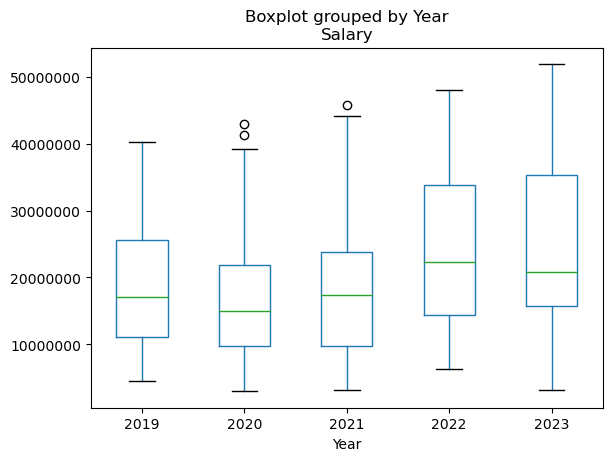

In [109]:
nba_salaries.boxplot(by ='Year', column=['Salary'], grid = False)

plt.ticklabel_format(style='plain', useOffset=False, axis='y')

plt.show()

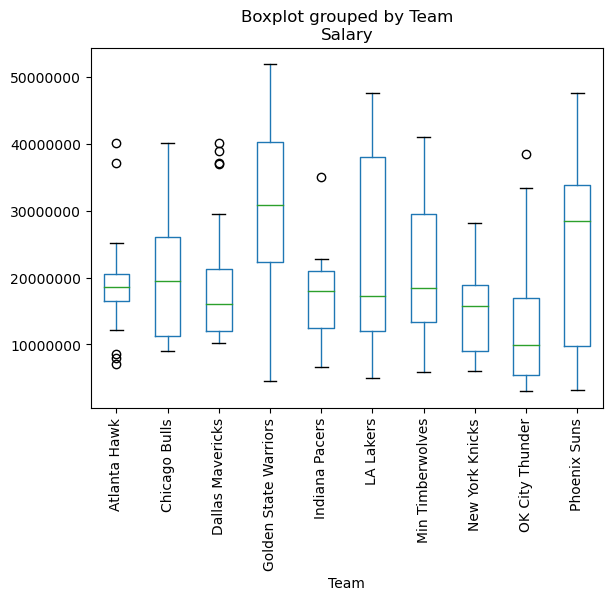

In [101]:
nba_salaries.boxplot(by ='Team', column=['Salary'], grid = False)
plt.xticks(rotation='vertical')
plt.ticklabel_format(style='plain', useOffset=False, axis='y')

plt.show()


In [128]:
nba_2023 = nba_salaries[nba_salaries['Year']== 2023]
nba_2023.head()

,Year,Team,Player,Salary,Incentative
0,2023,Atlanta Hawk,Trae Young,40064220,NaN
1,2023,Atlanta Hawk,Clint Capela,20616000,"$2,000,000.00"
2,2023,Atlanta Hawk,De'Andre Hunter,20089286,NaN
3,2023,Atlanta Hawk,Bogdan Bogdanovic,18700000,NaN
4,2023,Atlanta Hawk,Dejounte Murray,18214000,"$500,000.00"


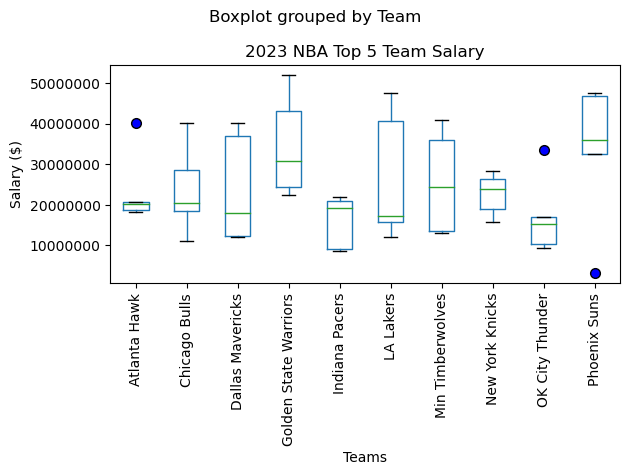

In [151]:
nba_2023.boxplot(by ='Team', column=['Salary'], grid = False,
    flierprops = dict(marker='o', markerfacecolor='blue', markersize=7,
                  linestyle='none', markeredgecolor='black'))
plt.title('2023 NBA Top 5 Team Salary')
plt.xlabel('Teams')
plt.xticks(rotation='vertical')
plt.ylabel('Salary ($)')
plt.ticklabel_format(style='plain', useOffset=False, axis='y')
plt.tight_layout()

plt.savefig("graph_outputs/NBA_Top5_Teams_Salary_2023.png")
plt.show()

In [146]:
nba_2019 = nba_salaries[nba_salaries['Year']== 2019]
nba_2019.head()

,Year,Team,Player,Salary,Incentative
200,2019,Atlanta Hawk,Chandler Parson,25102512,NaN
201,2019,Atlanta Hawk,Jeff Teague,19000000,NaN
202,2019,Atlanta Hawk,Evan Turner,18606556,NaN
203,2019,Atlanta Hawk,Dewayne Dedmon,13333334,NaN
204,2019,Atlanta Hawk,De'Andre Hunter,7068360,NaN


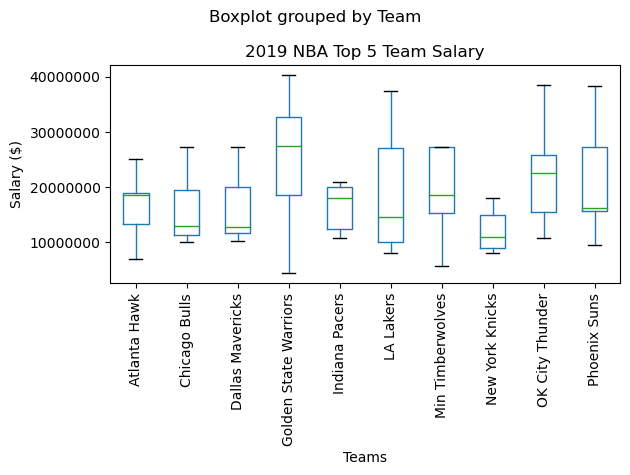

In [149]:
nba_2019.boxplot(by ='Team', column=['Salary'], grid = False)
    #flierprops = dict(marker='o', markerfacecolor='orange', markersize=7,
                  #linestyle='none', markeredgecolor='black'))
plt.title('2019 NBA Top 5 Team Salary')
plt.xlabel('Teams')
plt.xticks(rotation='vertical')
plt.ylabel('Salary ($)')
plt.ticklabel_format(style='plain', useOffset=False, axis='y')
plt.tight_layout()

plt.savefig("graph_outputs/NBA_Top5_Teams_Salary_2019.png")
plt.show()

In [38]:
list(Salary)

[51915615.0,
 47649433.0,
 47607350.0,
 46741590.0,
 44211146.0,
 43219440.0,
 41358814.0,
 41000000.0,
 40600080.0,
 40064220.0]

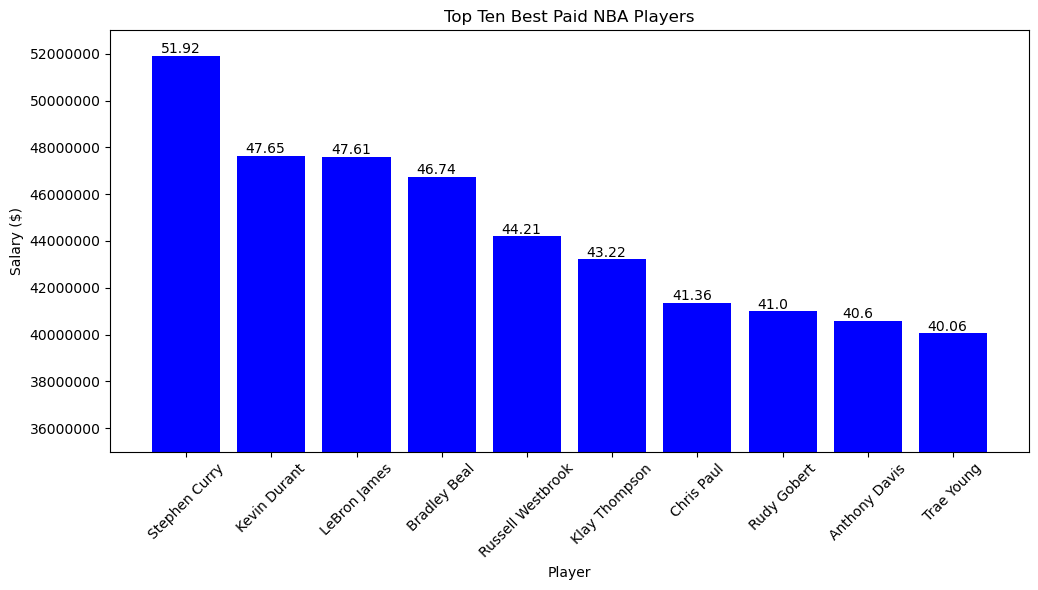

In [64]:
#top_ten_best_paid_nba = nba_salaries.sort_values(by = "Salary", ascending = False)[:10]

plt.figure(figsize=(10,6))
bars = plt.bar(x_axis, Salary, facecolor = "blue")
plt.title("Top Ten Best Paid NBA Players")
plt.xlabel("Player")
plt.xticks(x_axis,Player,rotation=45)
plt.ylim(35e6,53e6)
plt.ylabel("Salary ($)")

# print(bars)
for b in bars:
#     print(b.get_height())
    plt.text(x = 0.1 + b.get_x(), y = 100000 + b.get_height(), s = str(round(b.get_height()/1000000,2)))

plt.tight_layout()
plt.ticklabel_format(style='plain', useOffset=False, axis='y')

plt.savefig("graph_outputs/TopTen_NBA.png")
plt.show()

In [ ]:
nba_salaries.columns

## WNBA Summary Stats

In [65]:
wnba_salaries.dtypes

Year       int64
Team      object
Player    object
Salary    object
Bonus     object
dtype: object

In [66]:
wnba_salaries.columns

Index(['Year', 'Team ', 'Player', 'Salary', 'Bonus'], dtype='object')

In [67]:
wnba_salaries = wnba_salaries.rename(columns=str.strip)

In [68]:
wnba_salaries

,Year,Team,Player,Salary,Bonus
0,2023,Atlanta Dream,Cheyenne Parker,"$196,100.00",NaN
1,2023,Atlanta Dream,Allisha Gray,"$169,600.00","$25,000.00"
2,2023,Atlanta Dream,Danielle Robinson,"$155,000.00",NaN
3,2023,Atlanta Dream,Monique Billings,"$145,000.00",NaN
4,2023,Atlanta Dream,Nia Coffey,"$130,000.00",NaN
...,...,...,...,...,...
245,2019,Seattle Storm,Sue Bird,"$117,500.00",NaN
246,2019,Seattle Storm,Jewell Loyd,"$117,500.00",NaN
247,2019,Seattle Storm,Natasha Howard,"$115,000.00",NaN
248,2019,Seattle Storm,Courtney Paris,"$111,000.00",NaN


In [69]:
wnba_salaries.dtypes

Year       int64
Team      object
Player    object
Salary    object
Bonus     object
dtype: object

In [70]:
#wnba_salaries["Salary"] = wnba_salaries[" Salary "].str.replace(",","")

In [71]:
wnba_salaries["Salary"] = wnba_salaries["Salary"].str.replace("$","")

C:\Users\marye\AppData\Local\Temp\ipykernel_13560\941997773.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  wnba_salaries["Salary"] = wnba_salaries["Salary"].str.replace("$","")


In [72]:
wnba_salaries["Salary"] = wnba_salaries["Salary"].str.replace(",","")

In [73]:
#wnba_salaries.dtypes

In [74]:
wnba_salaries["Salary"] = wnba_salaries["Salary"].astype(float)

In [75]:
wnba_salaries.dtypes

Year        int64
Team       object
Player     object
Salary    float64
Bonus      object
dtype: object

In [76]:
wnba_salaries.sample(10)

,Year,Team,Player,Salary,Bonus
82,2022,Minnesota Lynx,Aerial Powers,196267,NaN
30,2023,Minnesota Lynx,Napheesa Collier,202154,NaN
57,2022,Chicago Sky,Courtney Vandersloot,195000,NaN
122,2021,Los Angeles Sparks,Erica Wheeler,180000,NaN
140,2021,Phoenix Mercury,Skylar Diggins-Smith,221450,NaN
127,2021,Las Vegas Aces,Angel McCoughtry,190500,NaN
35,2023,New York Liberty,Jonquel Jones,211150,NaN
100,2021,Atlanta Dream,Courtney Williams,190500,NaN
139,2021,New York Liberty,Marine Johannes,70040,NaN
137,2021,New York Liberty,Sami Whitcomb,150350,NaN


In [77]:
mean = wnba_salaries.groupby('Year')['Salary'].mean()
mean

Year
2019   109442
2020   139384
2021   160684
2022   164109
2023   172356
Name: Salary, dtype: float64

In [78]:
median = wnba_salaries.groupby('Year')['Salary'].median()
median

Year
2019   115000
2020   119500
2021   175000
2022   160000
2023   169250
Name: Salary, dtype: float64

In [79]:
variance = wnba_salaries.groupby('Year')['Salary'].var()
variance

Year
2019    151712901
2020   1694563088
2021   1907347395
2022   1996420817
2023   1445142210
Name: Salary, dtype: float64

In [80]:
std = wnba_salaries.groupby('Year')['Salary'].std()
std

Year
2019   12317
2020   41165
2021   43673
2022   44681
2023   38015
Name: Salary, dtype: float64

In [81]:
sem = wnba_salaries.groupby('Year')['Salary'].sem()
sem

Year
2019   1742
2020   5822
2021   6176
2022   6319
2023   5376
Name: Salary, dtype: float64

In [82]:
wnba_summary_stats = wnba_salaries.groupby('Year')['Salary'].agg(['mean', 'median', 'var', 'std','sem'])
wnba_summary_stats

,mean,median,var,std,sem
Year,,,,,
2019,109442,115000,151712901,12317,1742
2020,139384,119500,1694563088,41165,5822
2021,160684,175000,1907347395,43673,6176
2022,164109,160000,1996420817,44681,6319
2023,172356,169250,1445142210,38015,5376


## WNBA Graphs

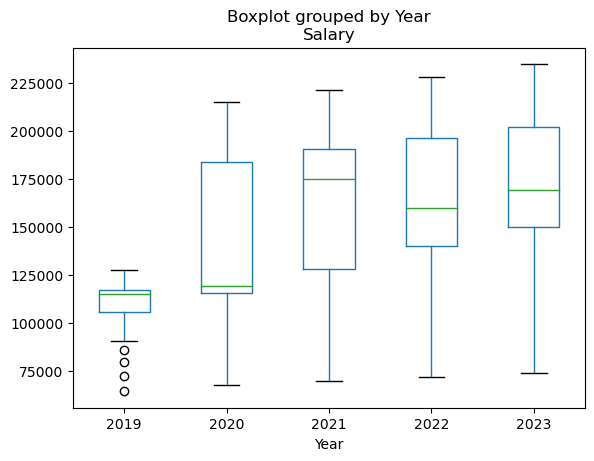

In [99]:
wnba_salaries.boxplot(by ='Year', column=['Salary'], grid = False)
plt.show()

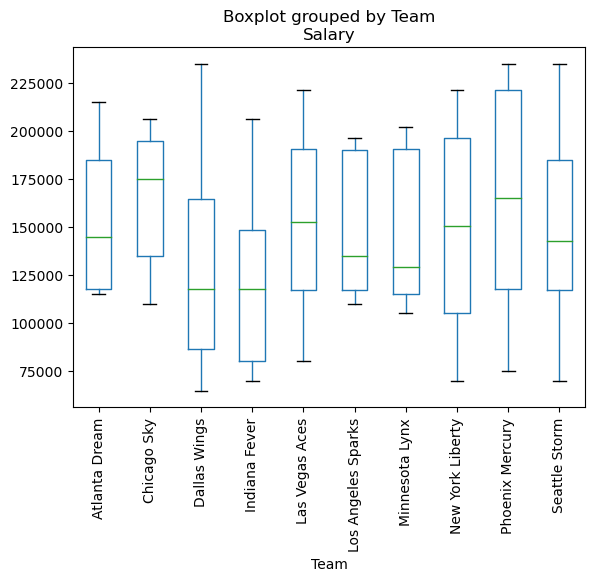

In [111]:
wnba_salaries.boxplot(by ='Team', column=['Salary'], grid = False)
plt.xticks(rotation='vertical')
plt.show()

In [150]:
wnba_2023 = wnba_salaries[wnba_salaries['Year']== 2023]
wnba_2023.head()

,Year,Team,Player,Salary,Bonus
0,2023,Atlanta Dream,Cheyenne Parker,196100,NaN
1,2023,Atlanta Dream,Allisha Gray,169600,"$25,000.00"
2,2023,Atlanta Dream,Danielle Robinson,155000,NaN
3,2023,Atlanta Dream,Monique Billings,145000,NaN
4,2023,Atlanta Dream,Nia Coffey,130000,NaN


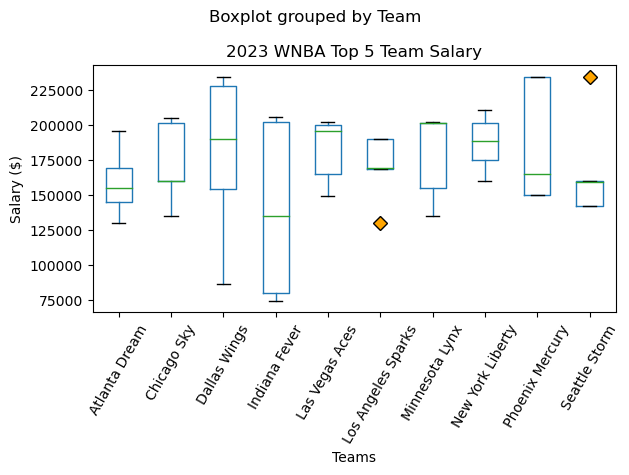

In [156]:
wnba_2023.boxplot(by ='Team', column=['Salary'], grid = False,
    flierprops = dict(marker='D', markerfacecolor='orange', markersize=7,
                  linestyle='none', markeredgecolor='black'))
plt.title('2023 WNBA Top 5 Team Salary')
plt.xlabel('Teams')
plt.xticks(rotation=60)
plt.ylabel('Salary ($)')
plt.ticklabel_format(style='plain', useOffset=False, axis='y')
plt.tight_layout()

plt.savefig("graph_outputs/WNBA_Top5_Teams_Salary_2023.png")
plt.show()

In [157]:
wnba_2019 = wnba_salaries[wnba_salaries['Year']== 2019]
wnba_2019.head()

,Year,Team,Player,Salary,Bonus
200,2019,Atlanta Dream,Angel McCoughtry,117500,NaN
201,2019,Atlanta Dream,Tiffany Hayes,115260,NaN
202,2019,Atlanta Dream,Alex Bentley,115000,NaN
203,2019,Atlanta Dream,Jessica Breland,115000,NaN
204,2019,Atlanta Dream,Elizabeth Williams,115000,NaN


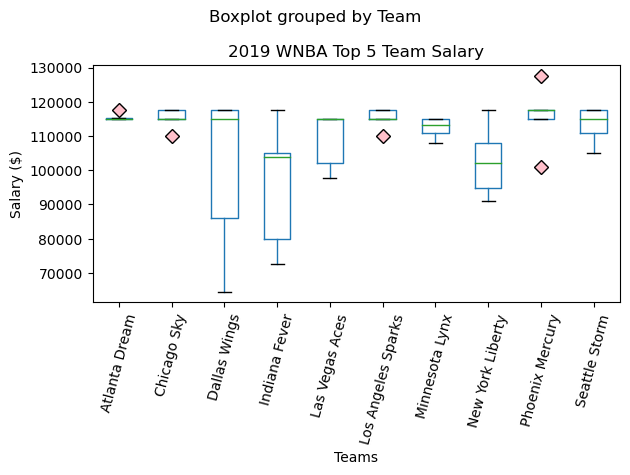

In [159]:
wnba_2019.boxplot(by ='Team', column=['Salary'], grid = False,
    flierprops = dict(marker='D', markerfacecolor='pink', markersize=7,
                  linestyle='none', markeredgecolor='black'))
plt.title('2019 WNBA Top 5 Team Salary')
plt.xlabel('Teams')
plt.xticks(rotation=75)
plt.ylabel('Salary ($)')
plt.ticklabel_format(style='plain', useOffset=False, axis='y')
plt.tight_layout()

plt.savefig("graph_outputs/WNBA_Top5_Teams_Salary_2019.png")
plt.show()

In [83]:
best_paid_wnba = wnba_salaries.sort_values(by = "Salary", ascending = False)[:20]
best_paid_wnba

,Year,Team,Player,Salary,Bonus
45,2023,Seattle Storm,Jewell Loyd,234936,NaN
40,2023,Phoenix Mercury,Diana Taurasi,234936,NaN
10,2023,Dallas Wings,Arike Ogunbowale,234936,NaN
41,2023,Phoenix Mercury,Skylar Diggins-Smith,234350,NaN
90,2022,Phoenix Mercury,Diana Taurasi,228094,NaN
95,2022,Seattle Storm,Jewell Loyd,228094,NaN
96,2022,Seattle Storm,Breanna Stewart,228094,NaN
91,2022,Phoenix Mercury,Skylar Diggins-Smith,227900,NaN
92,2022,Phoenix Mercury,Brittney Griner,227900,NaN
11,2023,Dallas Wings,Natasha Howard,227900,NaN


In [84]:
wnba_top_ten = best_paid_wnba.drop_duplicates(["Player"])
display(wnba_top_ten)

,Year,Team,Player,Salary,Bonus
45,2023,Seattle Storm,Jewell Loyd,234936,NaN
40,2023,Phoenix Mercury,Diana Taurasi,234936,NaN
10,2023,Dallas Wings,Arike Ogunbowale,234936,NaN
41,2023,Phoenix Mercury,Skylar Diggins-Smith,234350,NaN
96,2022,Seattle Storm,Breanna Stewart,228094,NaN
92,2022,Phoenix Mercury,Brittney Griner,227900,NaN
11,2023,Dallas Wings,Natasha Howard,227900,NaN
125,2021,Las Vegas Aces,Liz Cambage,221450,NaN
145,2021,Seattle Storm,Sue Bird,221450,NaN
50,2022,Atlanta Dream,Tiffany Hayes,215000,NaN


In [85]:
wnba_x_axis = np.arange(0, len(wnba_top_ten["Player"]))

In [86]:
wnba_player = wnba_top_ten["Player"]

In [87]:
wnba_salary = wnba_top_ten['Salary']

In [164]:
#plt.figure(figsize=(10,6))
plt.bar(wnba_x_axis, wnba_salary, facecolor = "orange")
plt.title("Top Ten Best Paid WNBA Players")
plt.xlabel("Player")
plt.xticks(wnba_x_axis,wnba_player,rotation=45)
plt.ylim(210000,236000)
plt.ylabel("Salary ($)")
# print(bars)
for b in bars:
#     print(b.get_height())
    plt.text(x = 0.1 + b.get_x(), y = 100 + b.get_height(), s = str(round(b.get_height()/10,2)))

#plt.tight_layout()

plt.savefig("graph_outputs/TopTen_WNBA.png")
plt.show()

ValueError: Image size of 619x735189 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

In [90]:
df2 = wnba_salaries.describe()
df2

,Year,Salary
count,250,250
mean,2021,149195
std,1,43948
min,2019,64538
25%,2020,115000
50%,2021,145000
75%,2022,190375
max,2023,234936


In [91]:
df3 = df2["Salary"]

In [97]:
# #df2['Salary'].plot(kind = "bar", color = "orange")
# #df3.plot()
# df3.plot(kind = "bar", color = "orange")
# plt.title("WNBA Summary")
# plt.xlabel("Summary Stats")
# #plt.xticks(wnba_x_axis,wnba_player,rotation=45)
# #plt.ylim(210000,236000)
# plt.ylabel("Salary ($)")
# plt.tight_layout()
# #fig, ax = plt.subplots()
# #bar_container = ax.par(wnba_salaries.describe(),df2["Salary"])
# #ax.bar_label(bar_container, fmt='{:, .0f}')
# #for i, v in enumerate(df2["Salary"]):
#     #ax.text(i,v + 10000, str(v), ha="center", va="bottom")

# plt.savefig("graph_outputs/WNBA_summary.png")
# plt.show()

## NBA and WNB Graphs

In [93]:
nba_vs_wnba = pd.DataFrame({"nba": df['Salary'],
                           "wnba": df2['Salary']
                        })
nba_vs_wnba

,nba,wnba
count,250,250
mean,20479274,149195
std,11199813,43948
min,2964840,64538
25%,11080125,115000
50%,18357000,145000
75%,27503472,190375
max,51915615,234936


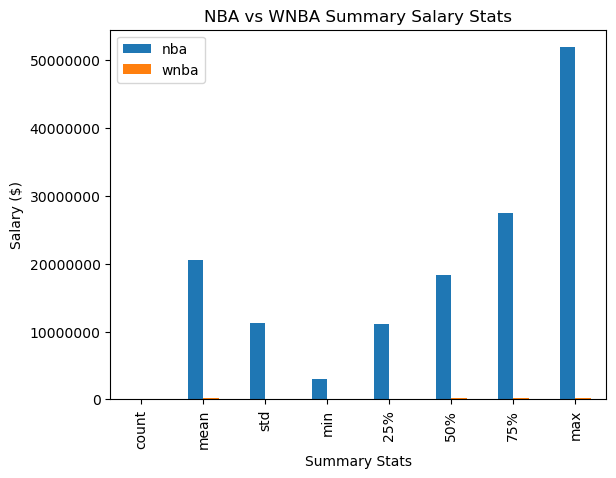

In [95]:
nba_vs_wnba.plot(kind = "bar")
plt.title("NBA vs WNBA Summary Salary Stats")
plt.xlabel("Summary Stats")
plt.ylabel("Salary ($)")
plt.ticklabel_format(style='plain', useOffset=False, axis='y')
plt.savefig("graph_outputs/NBAvsWNBA1.png")